# <font color="brown"><u>Rainfall Prediction Mini Project:)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt

# Load your dataset into a pandas DataFrame
df = pd.read_csv("rainfall.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'rainfall.csv'

In [ ]:
df.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


# Basic infromation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


# Statistical summary

In [ ]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


# Identify Duplicate values

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
361    False
362    False
363    False
364    False
365    False
Length: 366, dtype: bool

# Data preprocessing

In [ ]:
df.isnull()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
361,False,False,False,False,False,False,False,False,False,False,False,False
362,False,False,False,False,False,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False,False,False,False,False,False
364,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64


In [ ]:
df.shape

(366, 12)

In [ ]:
avg_temp_by_location = df.groupby('rainfall').count()
avg_temp_by_location

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
rainfall,,,,,,,,,,,
no,117,117,117,117,117,117,117,117,117,117,117
yes,249,249,249,249,249,249,249,249,249,248,248


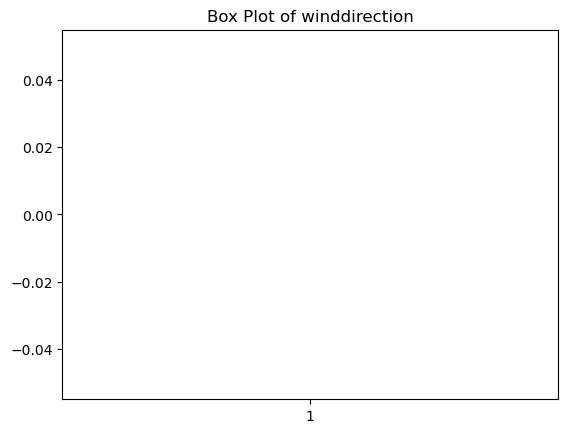

In [ ]:
plt.boxplot(df["winddirection"])
plt.title("Box Plot of winddirection")
plt.show()


# Imputing missing values by ffill

In [ ]:
# Data preprocessing (handle missing values, convert 'rainfall' to numeric)
df['rainfall'] = df['rainfall'].map({'yes': 1, 'no': 0})

In [ ]:
df["windspeed"]=df["windspeed"].fillna(method='ffill')

In [ ]:
df["winddirection"]=df["winddirection"].fillna(method='ffill')

In [ ]:
# Choose features and target variable
X = df[['maxtemp', 'temparature', 'mintemp', 'dewpoint', 'sunshine'] + list(df.filter(like='winddirection_')) + ['windspeed']]
y = df['rainfall']

In [ ]:
X

,maxtemp,temparature,mintemp,dewpoint,sunshine,windspeed
0,19.9,18.3,16.8,13.1,9.3,26.3
1,21.7,18.9,17.2,15.6,0.6,15.3
2,20.3,19.3,18.0,18.4,0.0,14.2
3,22.3,20.6,19.1,18.8,1.0,16.9
4,21.3,20.7,20.2,19.9,0.0,13.7
...,...,...,...,...,...,...
361,18.8,17.7,16.9,15.0,0.0,18.4
362,18.6,17.3,16.3,12.8,1.0,25.9
363,18.9,17.7,16.4,13.3,4.6,33.4
364,19.2,17.3,15.2,13.3,1.2,20.9


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.describe()

,maxtemp,temparature,mintemp,dewpoint,sunshine,windspeed
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,26.608562,24.111301,22.223973,20.378767,4.683219,21.239384
std,5.849712,5.524352,5.501500,5.879438,3.975357,9.808779
min,7.100000,4.900000,3.100000,-0.400000,0.000000,4.400000
25%,22.000000,19.850000,17.825000,16.575000,0.600000,13.275000
50%,28.250000,25.850000,24.250000,22.400000,3.900000,20.350000
75%,31.225000,28.700000,26.700000,25.000000,8.425000,27.150000
max,35.600000,31.500000,29.400000,26.700000,12.100000,59.500000


# 1.Using Logistic Regression

In [ ]:
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
acc=accuracy_score(y_test,y_pred)

print("Acuracy score:",acc)

Acuracy score: 0.7567567567567568


In [ ]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.65      0.48      0.55        23
           1       0.79      0.88      0.83        51

    accuracy                           0.76        74
   macro avg       0.72      0.68      0.69        74
weighted avg       0.75      0.76      0.75        74



# 2.DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred1=tree.predict(X_test)
y_pred1

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [ ]:
d2=pd.DataFrame({"Actual":y_test,"Predicted":y_pred1})
d2

,Actual,Predicted
193,1,1
33,1,1
15,1,1
310,1,1
57,1,0
...,...,...
82,1,1
94,1,0
192,1,1
307,1,1


In [ ]:
accuracy=accuracy_score(y_test,y_pred1)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.68


In [ ]:
report1=classification_report(y_test,y_pred1)
print(report1)

              precision    recall  f1-score   support

           0       0.48      0.48      0.48        23
           1       0.76      0.76      0.76        51

    accuracy                           0.68        74
   macro avg       0.62      0.62      0.62        74
weighted avg       0.68      0.68      0.68        74



# 3.Using Support Vector Calssifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
svcY_pred=svc.predict(X_test)
svcY_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [ ]:
# Make predictions on the testing set
svcY_pred= svc.predict(X_test)

# Evaluate the model
mse1= mean_squared_error(y_test, svcY_pred)

acc1=accuracy_score(y_test,svcY_pred)

#print("Mean Squared Error:", mse)

print("Acuracy score:",acc1)

Acuracy score: 0.7297297297297297


In [ ]:
r3=classification_report(y_test,svcY_pred)
print(r3)

              precision    recall  f1-score   support

           0       0.58      0.48      0.52        23
           1       0.78      0.84      0.81        51

    accuracy                           0.73        74
   macro avg       0.68      0.66      0.67        74
weighted avg       0.72      0.73      0.72        74



# 4.RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RandomForest =RandomForestClassifier()
RandomForest.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
ty_pred=RandomForest.predict(X_test)
ty_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
accuracy=accuracy_score(y_test,ty_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.76


In [ ]:
rr=classification_report(y_test,ty_pred)
print(rr)

              precision    recall  f1-score   support

           0       0.65      0.48      0.55        23
           1       0.79      0.88      0.83        51

    accuracy                           0.76        74
   macro avg       0.72      0.68      0.69        74
weighted avg       0.75      0.76      0.75        74



In [ ]:
# Create a new set of feature values for prediction
new_data = {
    'maxtemp': 30.0,
    'temparature': 28.0,
    'mintemp': 25.0,
    'dewpoint': 20.0,
    'sunshine': 6.0,
    'windspeed': 10.0
}

# Convert winddirection to one-hot encoded format (if needed)
# Example: You may need to create 'winddirection_N' and other columns accordingly.

# Create a DataFrame for the new data
new_data_df = pd.DataFrame([new_data])

# Use the trained model to make a prediction
predicted_rainfall = model.predict(new_data_df)
if predicted_rainfall[0]==1:
    print("Predicted Rainfall:YES")
else:
    print("Predicted Rainfall:NO")

#print("Predicted Rainfall:", predicted_rainfall[0])


Predicted Rainfall:YES


In [ ]:
predicted_rainfall

array([1], dtype=int64)

In [ ]:
import pickle

pickle.dump(model, open('logistic.pkl','wb'))

model1 = pickle.load(open('logistic.pkl','rb'))


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# Importing The Tkinter

In [ ]:
import tkinter as tk
from tkinter import Entry, Label
from PIL import Image, ImageTk
import joblib
import numpy as np

# Create the main application window
app = tk.Tk()
app.title("Rainfall Prediction")

# Load your machine learning model
model = joblib.load("logistic.pkl")

# Create a function to predict rainfall
def predict():
    try:
        maxtemp = float(maxtemp_entry.get())
        temperature = float(temperature_entry.get())
        mintemp = float(mintemp_entry.get())
        dewpoint = float(dewpoint_entry.get())
        sunshine = float(sunshine_entry.get())
        windspeed = float(windspeed_entry.get())

        # Prepare the input data for prediction
        input_data = np.array([[maxtemp, temperature, mintemp, dewpoint, sunshine, windspeed]])

        # Call your machine learning model to predict rainfall
        prediction = model.predict(input_data)

        print("Prediction:", prediction)  # Add this line for debugging

        # Display the prediction result
        if prediction[0] == 1:
            result_label.config(text="Rain will come (Yes)")
        else:
            result_label.config(text="No rain (No)")
    except ValueError:
        result_label.config(text="Invalid input. Please enter valid numbers.")


# Create a Canvas widget to hold the background image
canvas = tk.Canvas(app, width=800, height=600)  # Adjust the width and height as needed
canvas.pack()

# Load the image
bg_image = Image.open("rain.jpg")
bg_image = ImageTk.PhotoImage(bg_image)

# Create a label to display the background image
canvas.create_image(0, 0, anchor="nw", image=bg_image)

# Define a function to create a centered and styled text label
def create_centered_label(canvas, x, y, text, color="white", font=("Helvetica", 12)):
    return canvas.create_text(x, y, anchor="center", text=text, fill=color, font=font)

# Create centered and styled input labels on the canvas
maxtemp_label = create_centered_label(canvas, 150, 50, "Max Temperature:")
temperature_label = create_centered_label(canvas, 150, 100, "Temperature:")
mintemp_label = create_centered_label(canvas, 150, 150, "Min Temperature:")
dewpoint_label = create_centered_label(canvas, 150, 200, "Dew Point:")
sunshine_label = create_centered_label(canvas, 150, 250, "Sunshine:")
windspeed_label = create_centered_label(canvas, 150, 300, "Wind Speed:")

# Create centered and styled text entry boxes on the canvas
maxtemp_entry = Entry(app)
canvas.create_window(350, 50, window=maxtemp_entry, anchor="w")
temperature_entry = Entry(app)
canvas.create_window(350, 100, window=temperature_entry, anchor="w")
mintemp_entry = Entry(app)
canvas.create_window(350, 150, window=mintemp_entry, anchor="w")
dewpoint_entry = Entry(app)
canvas.create_window(350, 200, window=dewpoint_entry, anchor="w")
sunshine_entry = Entry(app)
canvas.create_window(350, 250, window=sunshine_entry, anchor="w")
windspeed_entry = Entry(app)
canvas.create_window(350, 300, window=windspeed_entry, anchor="w")

# Create a predict button on the canvas
predict_button = tk.Button(app, text="Predict Rainfall", command=predict)
canvas.create_window(250, 400, window=predict_button, anchor="w")

# Create a label widget to display the prediction result
result_label = Label(app, text="", font=("Helvetica", 14))
result_label.pack()

# Start the GUI event loop
app.mainloop()
